In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from func.LoadingData import LoadData
from func.scores import ModelMetrics

In [2]:
%matplotlib inline

Shape of DataFrame is (117927, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


None


Head of DataFrame:


,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900



Dataset statistics:


,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06



Number of NaN values in DataFrame:


Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64


Number of duplicates in DataFrame:


0


Visualisation of missing values in data set:


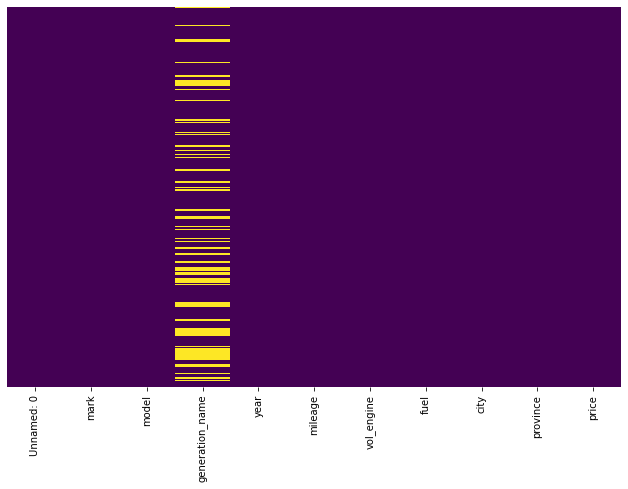

In [3]:
d = LoadData('Car_Prices_Poland_Kaggle.csv')
cars = d.create_data()

In [4]:
cars.drop(columns=['Unnamed: 0', 'generation_name'], axis=1, inplace=True)

In [5]:
cars.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [6]:
cars.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [7]:
cars_dumm = pd.get_dummies(data=cars, columns=['mark', 'model','fuel','city','province'],drop_first=True)
cars_dumm.head()

,year,mileage,vol_engine,price,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,...,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,2015,139568,1248,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,31991,1499,78501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015,278437,1598,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,47600,1248,30800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
print(len(cars_dumm.columns))
cars_dumm.columns

4806


Index(['year', 'mileage', 'vol_engine', 'price', 'mark_audi', 'mark_bmw',
       'mark_chevrolet', 'mark_citroen', 'mark_fiat', 'mark_ford',
       ...
       'province_Podlaskie', 'province_Pomorskie', 'province_Trenczyn',
       'province_Warmińsko-mazurskie', 'province_Wiedeń',
       'province_Wielkopolskie', 'province_Zachodniopomorskie',
       'province_Łódzkie', 'province_Śląskie', 'province_Świętokrzyskie'],
      dtype='object', length=4806)

In [9]:
renaming = {cars_dumm.columns[i]: cars_dumm.columns[i].split('_')[1] for i in range(4, len(cars_dumm.columns))}

In [10]:
cars_dumm.rename(axis=1, mapper=renaming)

,year,mileage,vol_engine,price,audi,bmw,chevrolet,citroen,fiat,ford,...,Podlaskie,Pomorskie,Trenczyn,Warmińsko-mazurskie,Wiedeń,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
0,2015,139568,1248,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,31991,1499,78501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015,278437,1598,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,47600,1248,30800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117923,2017,51000,1969,229900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117924,2016,83500,1969,135000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
117925,2017,174000,1969,154500,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
sc = StandardScaler()
cars_scaled = sc.fit_transform(cars_dumm.values)

In [13]:
from func.scores import Tuning
import optuna

c:\Users\barto\.conda\envs\deeplearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
print(cars_scaled[:,3])
X = np.delete(cars_scaled,3,axis=1)
X.shape

[-0.4055432   0.09668365 -0.51046606 ...  0.76275522  0.9926424
  0.70380979]


(117927, 4805)

In [15]:
y = cars_scaled[:, 3]
print(y.shape)
y

(117927,)


array([-0.4055432 ,  0.09668365, -0.51046606, ...,  0.76275522,
        0.9926424 ,  0.70380979])

In [16]:
tuning = Tuning(X,y)
tuning.split_data(0.1)

--------shapes--------
X train size:  (106134, 4805)
y train size:  (106134,)
X test size:  (11793, 4805)
y test size:  (11793,)


(array([[-1.21706921, -0.55621264,  0.29045853, ..., -0.26766531,
         -0.40625707, -0.17064939],
        [ 1.59482675, -1.52618128,  0.26715251, ..., -0.26766531,
         -0.40625707, -0.17064939],
        [-0.33835172,  0.25647374, -0.95563634, ..., -0.26766531,
         -0.40625707, -0.17064939],
        ...,
        [-1.04132572, -0.18919543, -0.66198057, ..., -0.26766531,
         -0.40625707, -0.17064939],
        [-1.39281271,  1.18030134, -0.19586029, ..., -0.26766531,
          2.46149565, -0.17064939],
        [ 0.01313527, -0.30179818, -0.02184206, ..., -0.26766531,
         -0.40625707, -0.17064939]]),
 array([[ 0.54036577, -0.84418815, -0.33258891, ..., -0.26766531,
         -0.40625707, -0.17064939],
        [-8.07106563, -1.52622458,  7.1035832 , ...,  3.73600891,
         -0.40625707, -0.17064939],
        [ 0.54036577, -0.16647135,  0.28890479, ..., -0.26766531,
         -0.40625707, -0.17064939],
        ...,
        [ 0.54036577,  0.19512196, -0.4910698 , ..., -

In [17]:
lgbm = tuning.lgbm_tunning()
study_lgm = optuna.create_study(direction='minimize', study_name="LGBMRegressor")
study_lgm.optimize(lgbm, n_trials=5)
print(study_lgm.best_params)

[I 2022-05-26 21:14:15,131] A new study created in memory with name: LGBMRegressor
[I 2022-05-26 21:14:55,136] Trial 0 finished with value: 0.23379334699054866 and parameters: {'n_estimators': 274, 'reg_alpha': 0.37051351220474626, 'reg_lambda': 0.004938457476414289, 'num_leaves': 210, 'colsample_bytree': 0.5269737203507608, 'subsample': 0.9442290291992869, 'min_child_samples': 84}. Best is trial 0 with value: 0.23379334699054866.
[I 2022-05-26 21:15:36,407] Trial 1 finished with value: 0.23872601516148478 and parameters: {'n_estimators': 334, 'reg_alpha': 2.4617576256684695, 'reg_lambda': 0.08829789055927878, 'num_leaves': 209, 'colsample_bytree': 0.8323520960554511, 'subsample': 0.671038497456054, 'min_child_samples': 87}. Best is trial 0 with value: 0.23379334699054866.
[I 2022-05-26 21:16:28,614] Trial 2 finished with value: 0.22045531222070466 and parameters: {'n_estimators': 450, 'reg_alpha': 1.9555124459382455e-05, 'reg_lambda': 0.05041977641303833, 'num_leaves': 188, 'colsample

{'n_estimators': 209, 'reg_alpha': 4.579761912253526e-08, 'reg_lambda': 0.05556953835133028, 'num_leaves': 101, 'colsample_bytree': 0.6736001169481415, 'subsample': 0.7741897653550532, 'min_child_samples': 19}


In [18]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRFRegressor, XGBRegressor

In [19]:
lg = LGBMRegressor(**study_lgm.best_params)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
r2_score(y_test, pred)

0.9521030228353488

In [20]:
from func.scores import Tuning
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


In [21]:
xb = tuning.xgb_tunning()
study_xgb = optuna.create_study(direction='minimize', study_name='XGBoost')
study_xgb.optimize(xb, n_trials=5)
print(study_xgb.best_params)

[I 2022-05-26 21:18:46,275] A new study created in memory with name: XGBoost
[I 2022-05-26 21:19:40,528] Trial 0 finished with value: 0.3414903390876768 and parameters: {'n_estimators': 138, 'reg_alpha': 0.7880713762868043, 'max_depth': 9, 'max_leaves': 96, 'eta': 0.7350699614381839, 'min_child_weight': 8, 'subsample': 0.6575320120386451, 'gamma': 0.06486831485624303}. Best is trial 0 with value: 0.3414903390876768.
[I 2022-05-26 21:20:14,105] Trial 1 finished with value: 0.370304673236917 and parameters: {'n_estimators': 123, 'reg_alpha': 0.8296004313858523, 'max_depth': 17, 'max_leaves': 46, 'eta': 0.9467557798821492, 'min_child_weight': 13, 'subsample': 0.6778957501360148, 'gamma': 0.11170433517955088}. Best is trial 0 with value: 0.3414903390876768.
[I 2022-05-26 21:21:02,666] Trial 2 finished with value: 0.34992182109819814 and parameters: {'n_estimators': 191, 'reg_alpha': 0.35720004451114107, 'max_depth': 7, 'max_leaves': 167, 'eta': 0.24132261840237954, 'min_child_weight': 18, 

{'n_estimators': 193, 'reg_alpha': 0.12078466592340736, 'max_depth': 12, 'max_leaves': 162, 'eta': 0.2676964010546347, 'min_child_weight': 14, 'subsample': 0.558406107505247, 'gamma': 0.5473956073009071}


In [22]:
xgbr = XGBRegressor(**study_xgb.best_params).fit(X_train, y_train)
prediction = xgbr.predict(X_test)
r2_score(y_test, prediction)


0.9466242623371507

In [23]:
kf = KFold(n_splits=3, shuffle=True)
cross_validate(lg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

{'fit_time': array([27.00066137, 40.32495856, 21.88901973]),
 'score_time': array([0.28300023, 0.48600125, 0.48099804]),
 'test_score': array([-0.05303668, -0.07629299, -0.05707343]),
 'train_score': array([-0.03528423, -0.03256485, -0.03379739])}

In [24]:
np.mean(cross_val_score(lg, X_train, y_train, cv=kf))

0.9366501329147544

In [25]:
study_lgm.best_params

{'n_estimators': 209,
 'reg_alpha': 4.579761912253526e-08,
 'reg_lambda': 0.05556953835133028,
 'num_leaves': 101,
 'colsample_bytree': 0.6736001169481415,
 'subsample': 0.7741897653550532,
 'min_child_samples': 19}